In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import ast
from itertools import groupby
import statistics
from tqdm import tqdm_notebook as tqdm

In [331]:
interest = pd.read_csv('valassis_dataset/interest_topics.csv')

In [345]:
train = pd.read_csv('valassis_dataset/training.csv')
validation = pd.read_csv('valassis_dataset/validation.csv')
train['ltiFeatures'] = train['ltiFeatures'].apply(ast.literal_eval)
train['stiFeatures'] = train['stiFeatures'].apply(ast.literal_eval)
validation['ltiFeatures'] = validation['ltiFeatures'].apply(ast.literal_eval)
validation['stiFeatures'] = validation['stiFeatures'].apply(ast.literal_eval)

In [15]:
train.shape,validation.shape

((96406, 4), (80008, 4))

In [6]:
interest.head()

,topic_id,topic_name
0,3,/Arts & Entertainment
1,5,/Computers & Electronics
2,7,/Finance
3,8,/Games
4,11,/Home & Garden


In [10]:
train.head()

,userID,inAudience,ltiFeatures,stiFeatures
0,1,True,"{'45': 0.020536141517834786, '47': 0.003117529...",{}
1,2,True,"{'45': 0.001158253110658664, '592': 0.01546380...",{}
2,3,True,"{'908': 0.002470851264264668, '590': 0.0021402...",{}
3,4,True,"{'1187': 0.001127974558171163, '1780': 0.00117...",{}
4,5,True,"{'907': 0.025339209040149392, '1187': 0.006020...","{'907': 0.10445132121076425, '908': 0.05651522..."


In [12]:
validation.head()

,userID,inAudience,ltiFeatures,stiFeatures
0,0,True,"{'89': 0.0027281240558934, '1264': 0.001862958...",{}
1,1,True,"{'47': 0.0019292939671486482, '1187': 0.012261...",{}
2,2,True,"{'45': 0.001961152113619305, '47': 0.001584126...",{}
3,3,True,"{'1253': 0.006566573072362829, '1164': 0.00327...",{}
4,4,True,"{'78': 0.013096540307802428, '1198': 0.0025546...",{}


In [14]:
validation['userID'].nunique()

80008

In [346]:
main_cat = []
test = []
for val in interest['topic_name']:
    main_cat.append(val.split('/')[1])


In [347]:
l = main_cat
counts = [(i, len(list(c))) for i,c in groupby(sorted(l))]
print(counts)

[('Arts & Entertainment', 142), ('Autos & Vehicles', 108), ('Beauty & Fitness', 26), ('Books & Literature', 9), ('Business & Industrial', 121), ('Computers & Electronics', 139), ('Finance', 55), ('Food & Drink', 74), ('Games', 44), ('Health', 89), ('Hobbies & Leisure', 35), ('Home & Garden', 59), ('Internet & Telecom', 34), ('Jobs & Education', 37), ('Law & Government', 44), ('News', 25), ('Online Communities', 20), ('People & Society', 86), ('Pets & Animals', 15), ('Real Estate', 18), ('Reference', 30), ('Science', 25), ('Shopping', 74), ('Sports', 74), ('Travel', 28)]


In [348]:
mains = pd.DataFrame()
mains['main_interest'] = list(set(main_cat))
mains['id'] = np.arange(mains.shape[0])+1

In [349]:
j = {}
for index, row in mains.iterrows():
    j[row['main_interest']] = row['id']

In [350]:
interest['main_topic'] = [x.split('/')[1] for x in interest['topic_name']]

In [351]:
interest['main_topic_id'] = [j[x] for x in interest['main_topic']]

In [352]:
sub_to_main = {}
for index, row in interest.iterrows():
    sub_to_main[row['topic_id']] = row['main_topic_id']

In [353]:
#############

In [354]:
train['ltiFeatures']

0        {'45': 0.020536141517834786, '47': 0.003117529...
1        {'45': 0.001158253110658664, '592': 0.01546380...
2        {'908': 0.002470851264264668, '590': 0.0021402...
3        {'1187': 0.001127974558171163, '1780': 0.00117...
4        {'907': 0.025339209040149392, '1187': 0.006020...
                               ...                        
96401    {'44': 0.011195347589604995, '1187': 0.0034311...
96402    {'907': 0.035128099674104664, '908': 0.0010388...
96403    {'909': 0.0016440986655652523, '270': 0.020136...
96404    {'1084': 0.0014829346253169523, '690': 0.00749...
96405    {'1187': 0.0148864000217648, '191': 0.01155167...
Name: ltiFeatures, Length: 96406, dtype: object

In [380]:
val.keys()

dict_keys(['1187', '191', '590', '592', '473', '594', '870', '353', '112', '358', '359', '636', '94', '95', '917', '12', '16', '18', '1077', '1231', '1073', '1071', '1107', '122', '1106', '365', '3', '401', '1222', '886', '646', '408', '529', '1109', '1108', '1867', '24', '371', '253', '531', '412', '258', '1113', '538', '539', '419', '33', '34', '35', '1011', '1010', '1097', '264', '784', '422', '785', '547', '704', '41', '1802', '44', '45', '1142', '1021', '396', '276', '433', '317', '1779', '58', '1396', '1030', '325', '1265', '569', '449', '208', '63', '67', '1285', '690', '692', '572', '694', '299', '211', '179', '215', '978', '615', '616', '617', '619', '75', '1174', '182', '1171', '184', '185', '582', '188', '344', '1049', '1048', '504', '507'])

In [387]:
temp_d

{11: [0.020536141517834786],
 4: [0.003117529436563834],
 15: None,
 9: [0.0011979804302637393]}

In [397]:
temp_d

{11: [0.020536141517834786],
 4: [0.003117529436563834],
 15: None,
 9: [0.0011979804302637393]}

In [409]:

from collections import defaultdict
list_new_d = []
for val in tqdm(train['ltiFeatures']):
    temp_d = defaultdict(list)
    for val2,val3 in zip(val.keys(),val.values()):
        if int(val2) in sub_to_main.keys():
            temp_d[sub_to_main[int(val2)]].append(val3)
    for val4 in temp_d.keys():
        try:
            temp_d[val4] = np.mean(temp_d[val4])
        except:
            temp_d[val4] = temp_d[val4]
    list_new_d.append(dict(temp_d))

In [410]:
from collections import defaultdict
list_new_std = []
for val in tqdm(train['ltiFeatures']):
    temp_d = defaultdict(list)
    for val2,val3 in zip(val.keys(),val.values()):
        if int(val2) in sub_to_main.keys():
            temp_d[sub_to_main[int(val2)]].append(val3)
    for val4 in temp_d.keys():
        try:
            temp_d[val4] = np.std(temp_d[val4])
        except:
            temp_d[val4] = temp_d[val4]
    list_new_std.append(dict(temp_d))

In [411]:
from collections import defaultdict
list_new_sum = []
for val in tqdm(train['ltiFeatures']):
    temp_d = defaultdict(list)
    for val2,val3 in zip(val.keys(),val.values()):
        if int(val2) in sub_to_main.keys():
            temp_d[sub_to_main[int(val2)]].append(1)
    for val4 in temp_d.keys():
        try:
            temp_d[val4] = sum(temp_d[val4])
        except:
            temp_d[val4] = temp_d[val4]
    list_new_sum.append(dict(temp_d))

In [412]:
d_width = {'Arts & Entertainment': 111,
            'Computers & Electronics': 106,
            'Finance': 38,
            'Games': 35,
            'Home & Garden': 44,
            'Business & Industrial': 90,
            'Internet & Telecom': 23,
            'People & Society': 68,
            'News': 20,
            'Shopping': 57,
            'Law & Government': 37,
            'Sports': 59,
            'Books & Literature': 8,
            'Real Estate': 13,
            'Online Communities': 15,
            'Beauty & Fitness': 19,
            'Health': 63,
            'Autos & Vehicles': 91,
            'Jobs & Education': 30,
            'Hobbies & Leisure': 26,
            'Pets & Animals': 12,
            'Travel': 22,
            'Food & Drink': 57,
            'Reference': 19,
            'Science': 17}


In [413]:
d_width.values()

dict_values([111, 106, 38, 35, 44, 90, 23, 68, 20, 57, 37, 59, 8, 13, 15, 19, 63, 91, 30, 26, 12, 22, 57, 19, 17])

In [414]:
fin_d = {}
for key in d_width.keys():
    fin_d[j[key]] =  d_width[key]

In [418]:
train['ltiFeatures_std'] = list_new_std

In [419]:
train['ltiFeatures_sum'] = list_new_sum

In [417]:
train['ltiFeatures_main'] = list_new_d

In [449]:
fin_d

{10: 111,
 7: 106,
 21: 38,
 24: 35,
 12: 44,
 23: 90,
 6: 23,
 14: 68,
 15: 20,
 9: 57,
 17: 37,
 20: 59,
 3: 8,
 2: 13,
 8: 15,
 1: 19,
 11: 63,
 4: 91,
 25: 30,
 22: 26,
 16: 12,
 18: 22,
 19: 57,
 5: 19,
 13: 17}

In [436]:
train['ltiFeatures_sum']

0        {11: 8, 4: 7, 15: 11, 9: 2, 7: 1, 10: 3, 20: 6...
1        {11: 4, 10: 9, 15: 7, 4: 8, 17: 4, 19: 6, 1: 1...
2        {19: 5, 10: 24, 12: 5, 25: 5, 15: 9, 11: 10, 3...
3        {10: 8, 9: 3, 25: 2, 15: 6, 2: 1, 8: 1, 20: 5,...
4        {19: 14, 10: 11, 9: 11, 4: 1, 15: 12, 1: 6, 11...
                               ...                        
96401    {1: 2, 10: 20, 8: 2, 12: 2, 15: 14, 19: 5, 23:...
96402    {19: 12, 10: 24, 8: 5, 9: 9, 15: 16, 1: 8, 11:...
96403    {19: 5, 12: 10, 15: 11, 10: 5, 9: 2, 14: 6, 13...
96404    {5: 3, 15: 5, 14: 5, 10: 9, 13: 1, 16: 1, 18: ...
96405    {10: 35, 8: 6, 4: 1, 14: 7, 9: 4, 15: 10, 11: ...
Name: ltiFeatures_sum, Length: 96406, dtype: object

In [453]:
ratio = []
for i in range(train.shape[0]):
    m = max(train['ltiFeatures_main'][i].keys(), key=(lambda k: train['ltiFeatures_main'][i][k]))
    ratio.append(train['ltiFeatures_sum'][i][m] / fin_d[m])

In [455]:
train['centrality_score'] = ratio

In [456]:
test = pd.concat([train['userID'], train['ltiFeatures_main'].apply(pd.Series)], axis=1)

In [457]:
test.columns = ['userID'] + ['main_group_'+str(x) for x in test.columns[1:]]

In [458]:
train = pd.merge(train,test,how="left",on='userID')

In [459]:
train.fillna(0,inplace=True)

In [460]:
train.iloc[:,5:] = train.iloc[:,5:].round(5)

In [461]:
train['inAudience'] = [1 if x == True else 0 for x in train['inAudience']]

In [250]:
#train.drop(['ltiFeatures','ltiFeatures_main','stiFeatures'],axis=1).set_index('userID').to_csv('train_processed_1.csv')

In [462]:
train.shape

(96406, 33)

In [ ]:
sns.countplot(train[train['inAudience']==1][''])

In [253]:
train.head()

,userID,inAudience,ltiFeatures,stiFeatures,ltiFeatures_main,main_group_1,main_group_2,main_group_3,main_group_4,main_group_5,...,main_group_16,main_group_17,main_group_18,main_group_19,main_group_20,main_group_21,main_group_22,main_group_23,main_group_24,main_group_25
0,1,1,"{'45': 0.020536141517834786, '47': 0.003117529...",{},"{11: 0.0029968793193499246, 4: 0.0024753203376...",0.00000,0.00447,0.01109,0.00248,0.00357,...,0.00000,0.00102,0.00404,0.00000,0.01095,0.01046,0.00000,0.00000,0.00000,0.00592
1,2,1,"{'45': 0.001158253110658664, '592': 0.01546380...",{},"{11: 0.0032400319782587197, 10: 0.005845712515...",0.00104,0.00000,0.00000,0.00145,0.00104,...,0.00000,0.00109,0.00000,0.01760,0.00561,0.00699,0.00000,0.00000,0.00407,0.00287
2,3,1,"{'908': 0.002470851264264668, '590': 0.0021402...",{},"{19: 0.0012142145067290974, 10: 0.008262132736...",0.00192,0.00242,0.01828,0.00216,0.01308,...,0.00162,0.00000,0.00263,0.00121,0.01732,0.00378,0.00116,0.00156,0.00132,0.00207
3,4,1,"{'1187': 0.001127974558171163, '1780': 0.00117...",{},"{10: 0.0017162258222652158, 9: 0.0142511935389...",0.00000,0.00145,0.00000,0.00000,0.01531,...,0.00000,0.01321,0.00000,0.00240,0.01556,0.00000,0.00000,0.00000,0.00000,0.00154
4,5,1,"{'907': 0.025339209040149392, '1187': 0.006020...","{'907': 0.10445132121076425, '908': 0.05651522...","{19: 0.0019163107520988852, 10: 0.050335101890...",0.00378,0.00721,0.01114,0.00109,0.00179,...,0.00000,0.00182,0.00144,0.00192,0.00000,0.00521,0.00000,0.00532,0.00000,0.00140


In [265]:
np.sort([0,1,2,1])[::-1]

array([2, 1, 1, 0])

In [463]:
diff = []
for val in train['ltiFeatures_main']:
    list_pair = np.sort([x for x in val.values()])[::-1]
    try:
        diff.append(list_pair[0]-list_pair[1])
    except:
        diff.append(0)

In [464]:
diff2 = []
for val in train['ltiFeatures']:
    list_pair = np.sort([x for x in val.values()])[::-1]
    try:
        diff2.append(list_pair[0]-list_pair[1])
    except:
        diff2.append(0)

In [465]:
train['difference_sub_cat'] = diff2
train['difference_main_cat'] = diff

In [466]:
np.corrcoef(train['difference_sub_cat'],train['difference_main_cat'])

array([[1.        , 0.47674981],
       [0.47674981, 1.        ]])

In [467]:
train['std_interest'] = train.iloc[:,2:-1].std(axis=1)

In [469]:
train[['userID','centrality_score','difference_sub_cat','difference_main_cat','std_interest']].set_index('userID').to_csv('almost.csv')


In [306]:
train.to_csv('processed2.csv')

In [298]:
train

,userID,inAudience,ltiFeatures,stiFeatures,ltiFeatures_main,main_group_1,main_group_2,main_group_3,main_group_4,main_group_5,...,main_group_18,main_group_19,main_group_20,main_group_21,main_group_22,main_group_23,main_group_24,main_group_25,difference_sub_cat,difference_main_cat
0,1,1,"{'45': 0.020536141517834786, '47': 0.003117529...",{},"{11: 0.0029968793193499246, 4: 0.0024753203376...",0.00000,0.00447,0.01109,0.00248,0.00357,...,0.00404,0.00000,0.01095,0.01046,0.00000,0.00000,0.00000,0.00592,0.092369,0.000141
1,2,1,"{'45': 0.001158253110658664, '592': 0.01546380...",{},"{11: 0.0032400319782587197, 10: 0.005845712515...",0.00104,0.00000,0.00000,0.00145,0.00104,...,0.00000,0.01760,0.00561,0.00699,0.00000,0.00000,0.00407,0.00287,0.123474,0.002241
2,3,1,"{'908': 0.002470851264264668, '590': 0.0021402...",{},"{19: 0.0012142145067290974, 10: 0.008262132736...",0.00192,0.00242,0.01828,0.00216,0.01308,...,0.00263,0.00121,0.01732,0.00378,0.00116,0.00156,0.00132,0.00207,0.001498,0.000963
3,4,1,"{'1187': 0.001127974558171163, '1780': 0.00117...",{},"{10: 0.0017162258222652158, 9: 0.0142511935389...",0.00000,0.00145,0.00000,0.00000,0.01531,...,0.00000,0.00240,0.01556,0.00000,0.00000,0.00000,0.00000,0.00154,0.374143,0.000146
4,5,1,"{'907': 0.025339209040149392, '1187': 0.006020...","{'907': 0.10445132121076425, '908': 0.05651522...","{19: 0.0019163107520988852, 10: 0.050335101890...",0.00378,0.00721,0.01114,0.00109,0.00179,...,0.00144,0.00192,0.00000,0.00521,0.00000,0.00532,0.00000,0.00140,0.170838,0.019185
5,6,1,"{'1781': 0.0026721798294172512, '1462': 0.0026...",{},"{6: 0.0010732408818297499, 10: 0.0021081111562...",0.00000,0.00276,0.00000,0.00000,0.00122,...,0.00143,0.00430,0.00247,0.00000,0.00214,0.01232,0.01454,0.00108,0.040081,0.001829
6,7,1,"{'89': 0.0019087156389939388, '1781': 0.001503...",{},"{4: 0.0016061002912532312, 10: 0.0158052331234...",0.00278,0.00127,0.00000,0.00161,0.00461,...,0.00618,0.00000,0.00121,0.00109,0.00000,0.00454,0.00000,0.00213,0.262902,0.006534
7,8,1,"{'907': 0.0016815927543668949, '908': 0.002122...",{},"{19: 0.0077925206941420215, 10: 0.002292449462...",0.00000,0.00000,0.00000,0.00105,0.00831,...,0.00851,0.00779,0.00544,0.00000,0.00000,0.00000,0.00000,0.00000,0.415291,0.544614
8,9,1,"{'89': 0.024745330587029456, '46': 0.022222222...",{},"{4: 0.009676672611385584, 23: 0.01754912485678...",0.00000,0.00539,0.00000,0.00968,0.01345,...,0.00284,0.00150,0.00524,0.00000,0.00000,0.01755,0.00000,0.00000,0.053503,0.052636
9,10,1,"{'809': 0.0011234149493485968, '68': 0.0144074...","{'1583': 0.002007047235965729, '1582': 0.01067...","{10: 0.0010704643026319249, 9: 0.0109754473034...",0.00000,0.00000,0.02314,0.00000,0.00000,...,0.00524,0.00000,0.00000,0.00576,0.00737,0.00000,0.00000,0.00297,0.586255,0.040233


In [281]:
import statistics

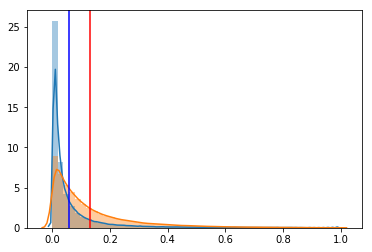

In [289]:
sns.distplot(diff)
sns.distplot(diff2)
plt.axvline(np.mean(diff),c='blue')
plt.axvline(np.mean(diff2),c='r')

In [291]:
max(diff2)

0.9848748651834635

In [290]:
max(diff)

0.9822336710141805

In [283]:
len(diff2)

96358

In [287]:
np.mean(diff2)

0.13072160556195728